# **Breast Cancer Wisconsin**

## **Introduction**


This project focuses on building a classification model to predict whether a tumor is malignant or benign using the Wisconsin Breast Cancer dataset. The dataset contains 569 instances and 30 features that describe the characteristics of cell nuclei from a digitized image of a fine needle aspirate (FNA) of a breast mass. By leveraging machine learning techniques, this project aims to contribute to healthcare applications by developing a diagnostic tool for early cancer detection.

## **Dataset Overview**

### **Dataset Characteristics**

* **Number of Instances**: 569

* **Number of Features**: 30 real-valued features

* **Target Variable**: Diagnosis (Malignant: 1, Benign: 0)

* **Missing Values**: None

### **Feature Description**

The dataset includes ten real-valued features calculated for each cell nucleus:

* **Radius**: Mean distance from center to points on the perimeter

* **Texture**: Standard deviation of gray-scale values

* **Perimeter**

* **Area**

* **Smoothness**: Local variation in radius lengths

* **Compactness**: Perimeter² / area - 1.0

* **Concavity**: Severity of concave portions of the contour

* **Concave Points**: Number of concave portions of the contour

* **Symmetry**

* **Fractal Dimension**: Coastline approximation

Each feature is measured as the mean, standard error, and worst-case value.

## **Exploratory Data Analysis (EDA)**

In [1]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# Import Necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Path to the dataset
path = "/content/drive/MyDrive/Projects/Machine Learning/Breast Cancer Wisconsin/data/"

In [26]:
import pandas as pd
import os


# Load the dataset
column_names = ['ID', 'Diagnosis'] + [f'{feature}_{stat}' for feature in
                ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
                'concavity', 'concave_points', 'symmetry', 'fractal_dimension'] for stat in ['mean', 'se', 'worst']]


file_path = path + 'wdbc.data'
if os.path.exists(file_path):
    df = pd.read_csv(file_path, header=None, names=column_names)
    df.head()
else:
    print(f"File not found at {file_path}")


In [27]:
# Preview the data
df.head()

,ID,Diagnosis,radius_mean,radius_se,radius_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,...,concavity_worst,concave_points_mean,concave_points_se,concave_points_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **Target Variable Distribution**

The target variable is imbalanced, with more benign cases than malignant:

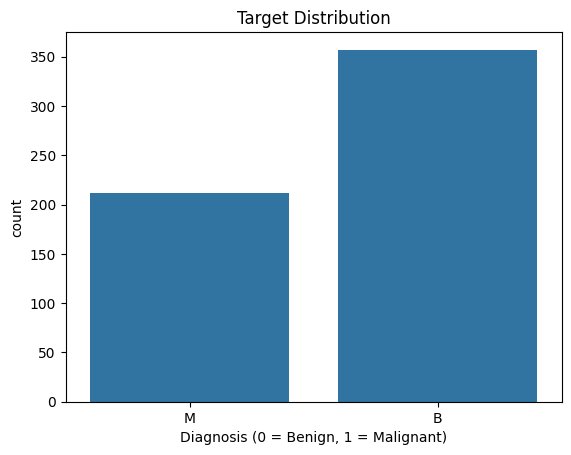

In [29]:
sns.countplot(x='Diagnosis', data=df)
plt.title('Target Distribution')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.show()

### **Correlation Heatmap**

A correlation heatmap reveals strong correlations among features like `radius_mean`, `perimeter_mean`, and `area_mean`. These relationships are expected, as these features are geometrically related.

In [31]:
# Convert 'Diagnosis' column to numeric
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})


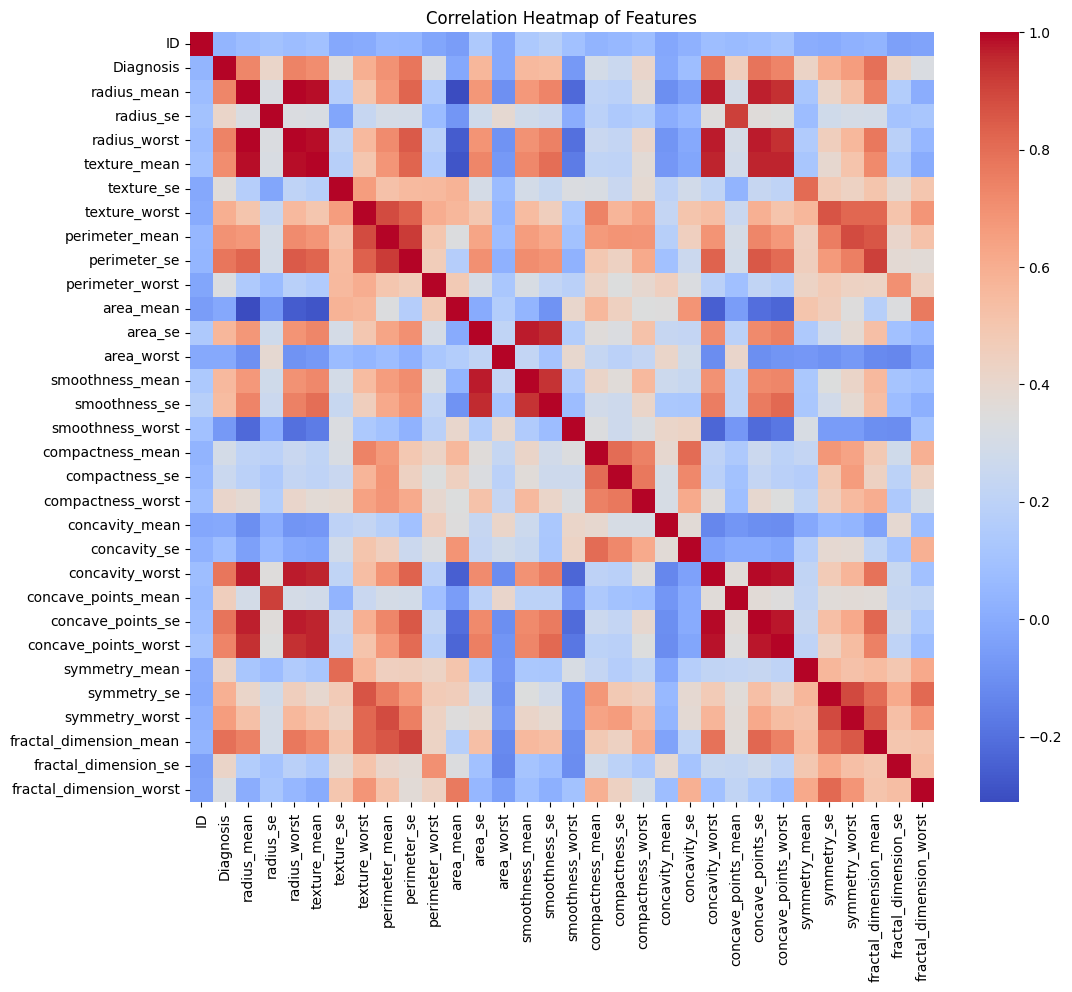

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

### **Distribution of Top Features**

Visualizing the distribution of key features such as `radius_mean`, `texture_mean`, and `area_mean` for each target class helps to understand separability:

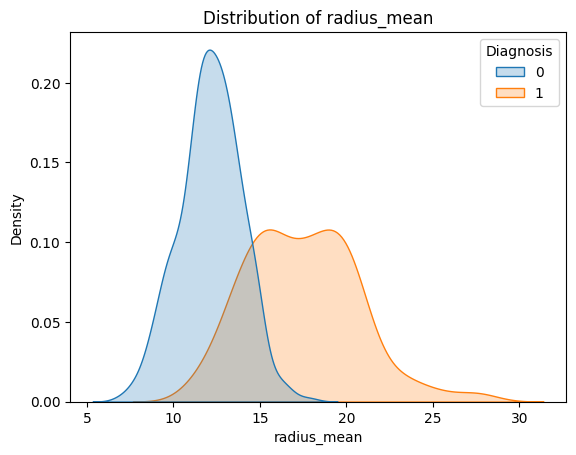

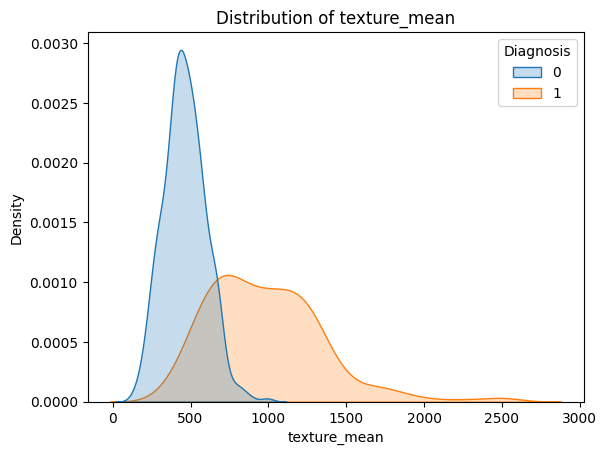

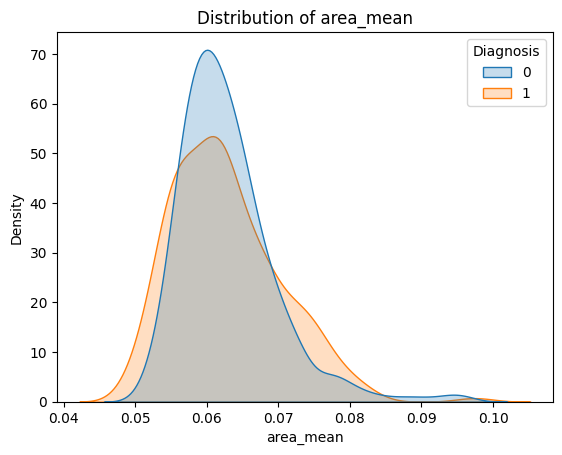

In [33]:
features = ['radius_mean', 'texture_mean', 'area_mean']
for feature in features:
    sns.kdeplot(data=df, x=feature, hue='Diagnosis', fill=True, common_norm=False)
    plt.title(f'Distribution of {feature}')
    plt.show()

## **Data Preprocessing**

### Steps Performed

1. **Encoding**: The `Diagnosis` column was encoded as binary (`0` for benign, `1` for malignant).

2. **Scaling**: All features were standardized using `StandardScaler` to ensure equal weightage in model training.

3. **Splitting**: The dataset was split into 80% training and 20% testing sets.

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert Diagnosis to binary (0 for benign, 1 for malignant)
df['Diagnosis'] = LabelEncoder().fit_transform(df['Diagnosis'])

# Drop the ID column
df.drop(columns=['ID'], inplace=True)

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('Diagnosis', axis=1))


In [18]:
from sklearn.model_selection import train_test_split

# Features and target
X = scaled_features
y = df['Diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Modeling and Results**

### **Logistic Regression**

* **Training Accuracy**: 98.68%

* **Test Accuracy**: 97.37%

Logistic Regression performed exceptionally well, achieving the highest test accuracy among the models.

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("Training Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))


Training Accuracy: 0.9868131868131869
Test Accuracy: 0.9736842105263158


### **Random Forest Classifier**

* **Test Accuracy**: 96.49%

The Random Forest model provided robust results with slightly lower accuracy than Logistic Regression.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Test Accuracy:", rf_model.score(X_test, y_test))


Random Forest Test Accuracy: 0.9649122807017544


### **Support Vector Machine (SVM)**

* **Test Accuracy**: 95.61%

The SVM model performed slightly worse than Logistic Regression and Random Forest, though it remained competitive.

In [21]:
from sklearn.svm import SVC

svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)
print("SVM Test Accuracy:", svc_model.score(X_test, y_test))


SVM Test Accuracy: 0.956140350877193


### **Confusion Matrix**

The confusion matrix summarizes the performance of the best model (Logistic Regression):

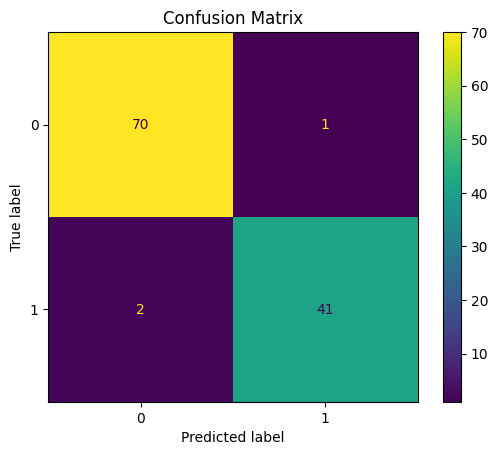

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()


* True Positives (TP): 41

* True Negatives (TN): 70

* False Positives (FP): 1

* False Negatives (FN): 2

The model achieved high precision and recall, minimizing misclassification.

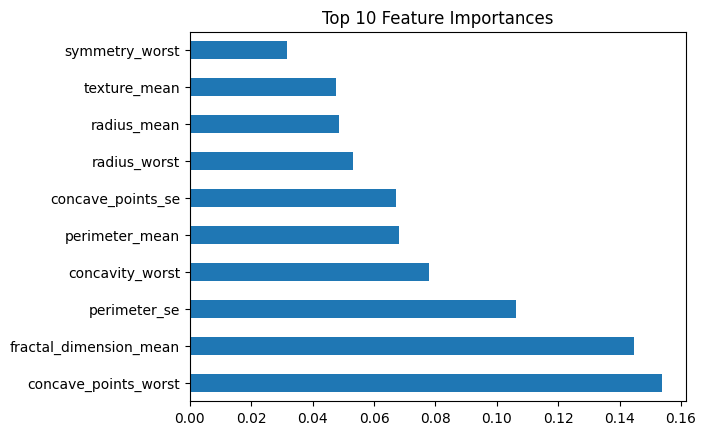

In [25]:
feature_importances = pd.Series(rf_model.feature_importances_, index=column_names[2:])
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()


## **Conclusions**

### **Key Insights**

1. **Logistic Regression** emerged as the best-performing model, with a test accuracy of 97.37%.

2. Features like `radius_mean`, `perimeter_mean`, and `area_mean` showed strong predictive power, as evidenced by their distributions and correlations.

3. All models demonstrated high performance, underscoring the dataset's quality and the effectiveness of preprocessing techniques.


### **Future Work**

* **Hyperparameter Optimization**: Fine-tuning parameters for Random Forest and SVM to further enhance performance.

* **Dimensionality Reduction**: Applying PCA or feature selection to simplify the model.

* **Deployment**: Developing an interactive tool for clinicians to input data and receive predictions.


### **Impact**

This project demonstrates the potential of machine learning in medical diagnostics, offering a step towards automated tools that support early cancer detection. The model's high accuracy and low misclassification rates highlight its reliability for healthcare applications.